# Monte-Carlo simulations
Monte Carlo simulation is a computational technique used to approximate the outcomes of complex systems or processes that involve uncertainty. It is named after the famous Monte Carlo Casino in Monaco, known for its games of chance and randomness. Monte Carlo simulation uses random sampling and probability distributions to model and analyze various scenarios, allowing for statistical inference and decision-making under uncertainty.

## Theoretical Explanation:

In a Monte Carlo simulation, the underlying system or process is represented by a mathematical model, which includes input variables and relationships among them. These input variables are usually uncertain and can follow probability distributions. By repeatedly sampling these variables, running simulations, and aggregating the results, we can estimate the behavior and outcomes of the system.

### Steps envolved

The Monte Carlo simulation algorithm involves the following steps:

- **Define the problem:** Clearly state the problem and identify the key variables and relationships involved.

- **Model the system:** Create a mathematical model that represents the behavior and interactions of the variables. This model can be based on mathematical equations, statistical models, or other representations.

- **Define input distributions:** Specify the probability distributions for the uncertain input variables. This can be done based on historical data, expert judgment, or assumptions. Common distributions include normal, log-normal, uniform, and triangular distributions.

- **Generate random samples:** Randomly generate values for the input variables based on their specified probability distributions. The number of samples should be sufficient to obtain reliable results.

- **Perform simulations:** Plug the generated input values into the model and perform simulations to calculate the output or outcomes of interest. Run multiple simulations to capture the variability and uncertainty in the system.

- **Analyze the results:** Analyze the output from the simulations to derive meaningful insights and draw conclusions. This may involve calculating summary statistics, creating visualizations, and assessing risk measures such as mean, standard deviation, quantiles, and probabilities.

- **Validate and refine:** Validate the simulation results by comparing them with real-world observations or known data. Refine the model and input distributions as necessary to improve accuracy and reliability.

## Mathematical Explanation:

At the core of Monte Carlo simulation is the generation of random numbers from the specified probability distributions. These random numbers are used to sample the input variables and simulate different scenarios. The simulation process involves repeatedly sampling the input variables and evaluating the model to obtain the output.

#### Example case:

Let's consider a simple example where we want to estimate the value of an investment portfolio after a certain period. We have the following input variables:

- Initial investment amount ($X$) following a normal distribution with mean $\mu$ and standard deviation $\sigma$.
- Annual return rate ($Y$) following a log-normal distribution with parameters μ' and σ'.

**Steps:**
To perform the Monte Carlo simulation, we would follow these steps:

- **Define the problem:** Estimate the value of the investment portfolio after a certain period.

- **Model the system:** Assume that the value of the portfolio at the end of the period is given by $X \times (1 + Y)$, where $X$ is the initial investment amount and $Y$ is the annual return rate.

- **Define input distributions:** Specify the probability distributions for $X$ and $Y$. 
  - For example, $X \sim \text{Normal}(\mu,\sigma)$ and 
  - $Y \sim \text{Log-Normal}(\mu', \sigma')$.

- **Generate random samples:** Randomly generate values for $X$ and $Y$ based on their specified distributions. For example, generate $N$ random samples for $X$ and $Y$.

- **Perform simulations:** Plug the generated values of $X$ and $Y$ into the model to calculate the portfolio value for each simulation. Repeat this process $N$ times to obtain $N$ simulated portfolio values.

- **Analyze the results:** Analyze the $N$ simulated portfolio values to calculate summary statistics, such as the mean, standard deviation, and percentiles. These statistics provide insights into the potential range of portfolio values and associated risks.

- **Validate and refine:** Validate the simulation results by comparing them with actual portfolio values or historical data. Refine the model or input distributions as needed to improve accuracy.

By running a large number of simulations and aggregating the results, Monte Carlo simulation provides a statistical framework for estimating the behavior and uncertainty of the investment portfolio. It allows risk analysts to make informed decisions, assess potential risks, and evaluate different strategies in a probabilistic manner.

In [8]:
import numpy as np

# Parameters for the simulation
simulations_per_year = 252 
num_simulations = 10000
initial_investment = 100000
expected_return = 0.08  # 8% return
volatility = 0.2 #(standard deviation)

# Generate random returns based on normal distribution
returns = np.random.normal(expected_return, volatility, num_simulations)

# Calculate portfolio values for each simulation
portfolio_values = initial_investment * (1 + returns)

# Calculate summary statistics
mean_portfolio_value = np.mean(portfolio_values)
std_portfolio_value = np.std(portfolio_values)
var_portfolio_value = np.percentile(portfolio_values, 5)  # VaR at 95% confidence level

# Print the results
print("Mean Portfolio Value:", mean_portfolio_value)
print("Standard Deviation of Portfolio Value:", std_portfolio_value)
print("VaR at 95% Confidence Level:", var_portfolio_value)

Mean Portfolio Value: 108028.73617544002
Standard Deviation of Portfolio Value: 19999.09434638074
VaR at 95% Confidence Level: 75567.41404498041


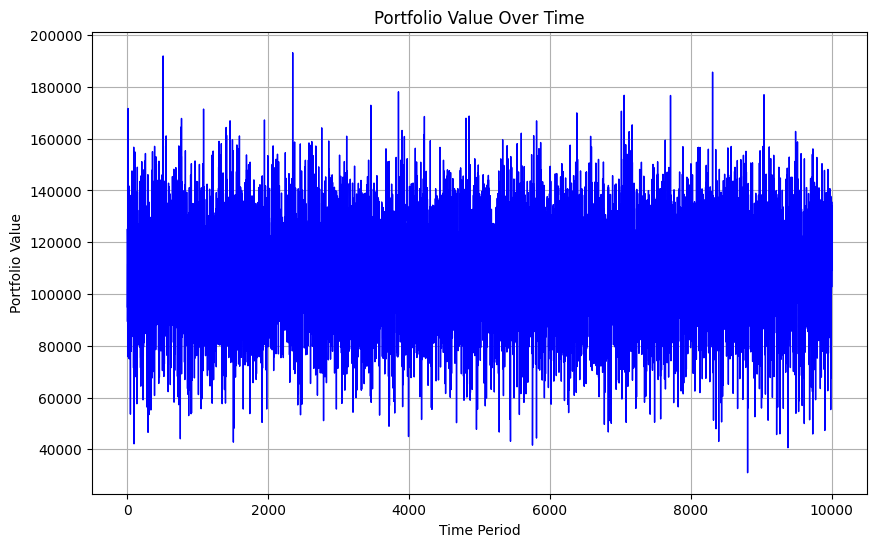

In [10]:
import matplotlib.pyplot as plt
# Create an array of time periods
time_periods = np.arange(num_simulations)

# Create an array of time periods in months
# time_periods = np.arange(1, num_simulations + 1) / 12

# Create an array of time periods in years
#time_periods = np.arange(num_simulations) / simulations_per_year

# Create an array of time periods
time_periods = np.arange(1, num_simulations + 1)

# Plot the portfolio values over time
plt.figure(figsize=(10, 6))
plt.plot(time_periods, portfolio_values, color='blue', lw=1)
plt.xlabel('Time Period')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.grid(True)
plt.show()

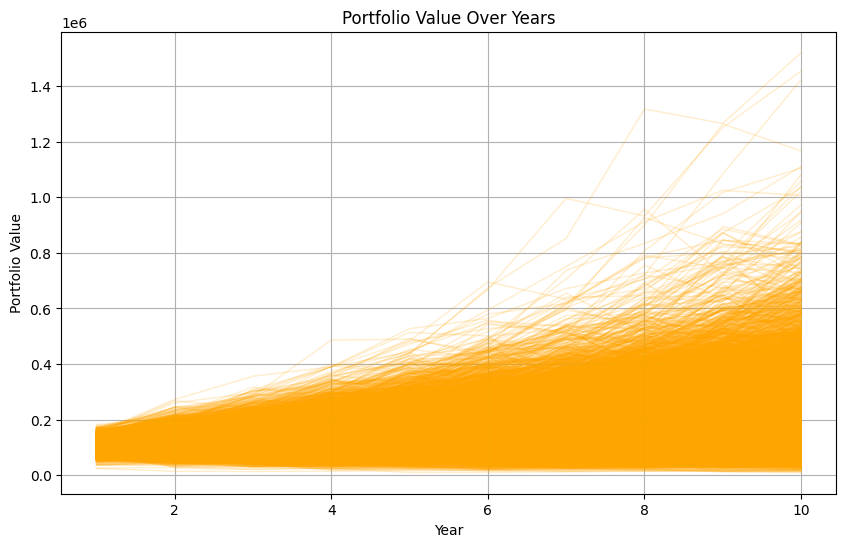

In [16]:
#Parameters for the simulation
num_simulations = 10000
initial_investment = 100000
expected_return = 0.08  # 8% return
volatility = 0.2
years = 10  # Number of years

# Generate random returns based on normal distribution
returns = np.random.normal(expected_return, volatility, (num_simulations, years))

# Calculate portfolio values for each simulation
portfolio_values = initial_investment * np.cumprod(1 + returns, axis=1)

# Create an array of years
years_array = np.arange(1, years + 1)

# Plot the portfolio values on a yearly basis
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(years_array, portfolio_values[i], lw=1, alpha=0.2, color='orange')

plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Years')
plt.grid(True)
plt.show()